
# Titanic datasets problem using Supervised learning

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
train_data=pd.read_csv(r'C:\Users\Sandesh Chand\Desktop\Titanic\train.csv')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_data=pd.read_csv(r'C:\Users\Sandesh Chand\Desktop\Titanic\test.csv')
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


# Exploratory data analysis
In the datasets we have two types of data :numerical and categorical. So we have to analyse both type of data in differnet ways.
For numerical:Corrplot,pivot table,feature importance
For categorical:bar charts,pivot table

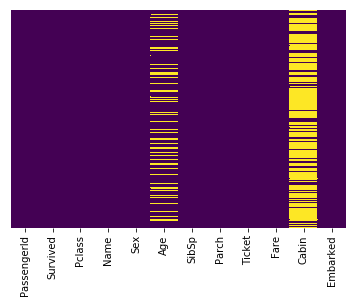

In [13]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

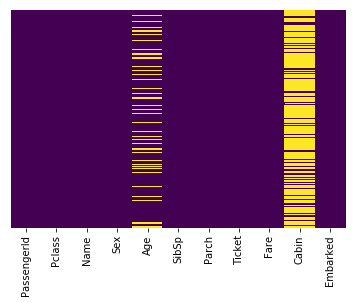

In [14]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Both training and testing data has lots of missing datas in Age and Cabin features.We have to fill the missing values with mean vlaues.

In [15]:
train_num=train_data[['Age','SibSp','Parch','Fare']]
train_cat=train_data[['Pclass','Sex','Ticket','Embarked','Cabin']]

C:\Users\Sandesh Chand\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sandesh Chand\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


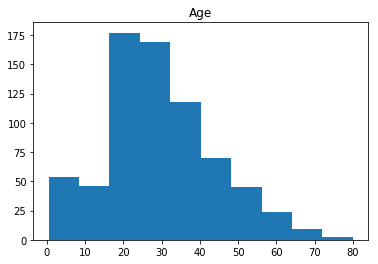

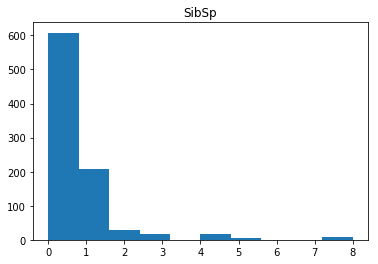

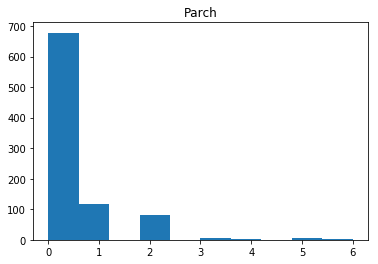

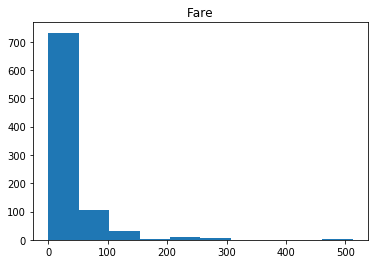

In [16]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


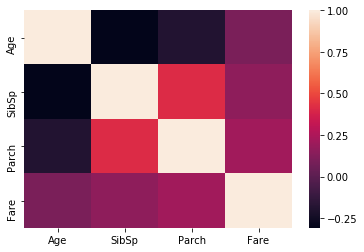

In [17]:
sns.heatmap(train_num.corr())
print(train_num.corr())

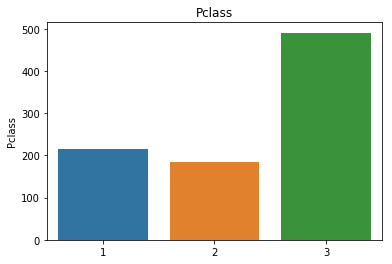

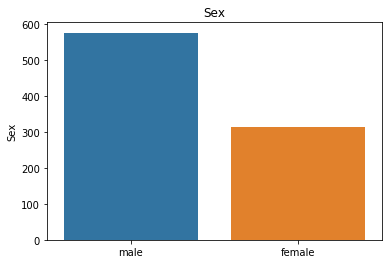

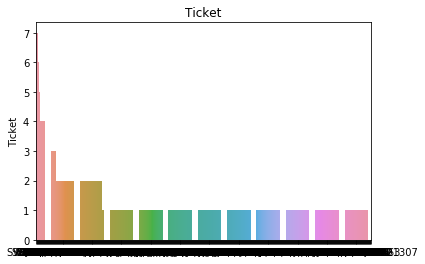

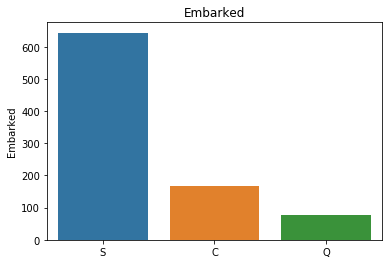

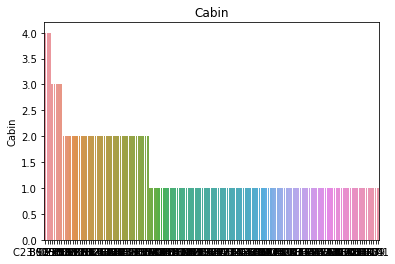

In [18]:
for i in train_cat.columns:
    sns.barplot(train_cat[i].value_counts().index,train_cat[i].value_counts()).set_title(i)
    plt.show()
    

In [19]:
df=pd.pivot_table(train_data,index='Survived',values=['Age','SibSp','Parch','Fare'])
df

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


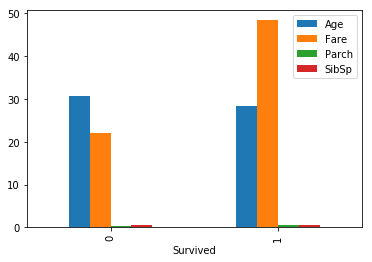

In [20]:
#sns.barplot(train_data,index='Survived',values=['Age','SibSp','Parch','Fare'])

df.plot(kind='bar')

Parch Features

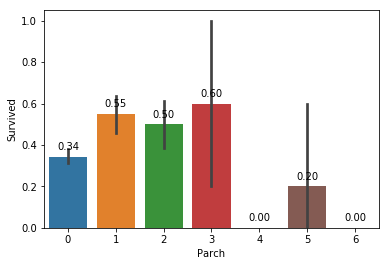

In [21]:

bplot=sns.barplot(x="Parch",y="Survived",data=train_data)
#print(len(train_data['Pa']))
for p in bplot.patches:
    bplot.annotate(format(p.get_height(),'.2f'),(p.get_x()+ p.get_width()/ 2., p.get_height()),ha='center',
               va='center',xytext=(0,10),textcoords='offset points')

Sex features

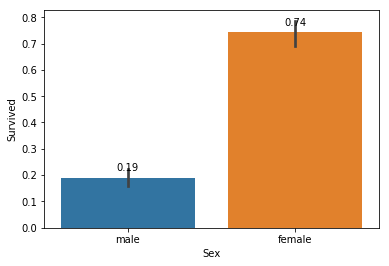

In [22]:
bplot=sns.barplot(x="Sex",y="Survived",data=train_data)
#print(len(train_data['Pa']))
for p in bplot.patches:
    bplot.annotate(format(p.get_height(),'.2f'),(p.get_x()+ p.get_width()/ 2., p.get_height()),ha='center',
               va='center',xytext=(0,10),textcoords='offset points')

Most of the females population were seurvied as caompare to men.

Pclass

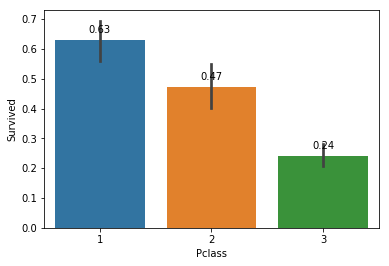

In [23]:
bplot=sns.barplot(x="Pclass",y="Survived",data=train_data)
#print(len(train_data['Pa']))
for p in bplot.patches:
    bplot.annotate(format(p.get_height(),'.2f'),(p.get_x()+ p.get_width()/ 2., p.get_height()),ha='center',
               va='center',xytext=(0,10),textcoords='offset points')

SibSp

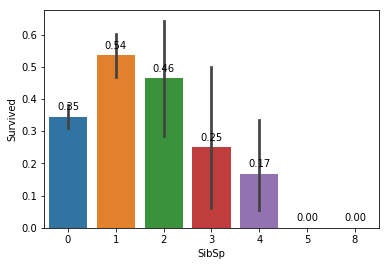

In [24]:
bplot=sns.barplot(x="SibSp",y="Survived",data=train_data)
#print(len(train_data['Pa']))
for p in bplot.patches:
    bplot.annotate(format(p.get_height(),'.2f'),(p.get_x()+ p.get_width()/ 2., p.get_height()),ha='center',
               va='center',xytext=(0,10),textcoords='offset points')

The passenger belongs to Cabin 1 has high number of survivals

In [25]:
"""

mean_train=train_data.mean()['Age']
mean_test=test_data.mean()['Age']
#train_data['Age'].value_counts()
train_data['Age']=train_data['Age'].fillna(mean_train,inplace=True)
test_data['Age']=test_data['Age'].fillna(mean_test,inplace=True)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Infant','Child','Teen','Student','Young','Adult','Senior']
train_data['AgeGroup']= pd.cut(train_data['Age'],bins, labels=labels)
test_data['AgeGroup']= pd.cut(test_data['Age'],bins, labels=labels)

bplot=sns.barplot(x="AgeGroup",y="Survived",data=train_data)
#print(len(train_data['Pa']))
for p in bplot.patches:
    bplot.annotate(format(p.get_height(),'.2f'),(p.get_x()+ p.get_width()/ 2., p.get_height()),ha='center',
               va='center',xytext=(0,10),textcoords='offset points')

    """

'\n\nmean_train=train_data.mean()[\'Age\']\nmean_test=test_data.mean()[\'Age\']\n#train_data[\'Age\'].value_counts()\ntrain_data[\'Age\']=train_data[\'Age\'].fillna(mean_train,inplace=True)\ntest_data[\'Age\']=test_data[\'Age\'].fillna(mean_test,inplace=True)\nbins=[-1,0,5,12,18,24,35,60,np.inf]\nlabels=[\'Unknown\',\'Infant\',\'Child\',\'Teen\',\'Student\',\'Young\',\'Adult\',\'Senior\']\ntrain_data[\'AgeGroup\']= pd.cut(train_data[\'Age\'],bins, labels=labels)\ntest_data[\'AgeGroup\']= pd.cut(test_data[\'Age\'],bins, labels=labels)\n\nbplot=sns.barplot(x="AgeGroup",y="Survived",data=train_data)\n#print(len(train_data[\'Pa\']))\nfor p in bplot.patches:\n    bplot.annotate(format(p.get_height(),\'.2f\'),(p.get_x()+ p.get_width()/ 2., p.get_height()),ha=\'center\',\n               va=\'center\',xytext=(0,10),textcoords=\'offset points\')\n\n    '

Data Preprocessing

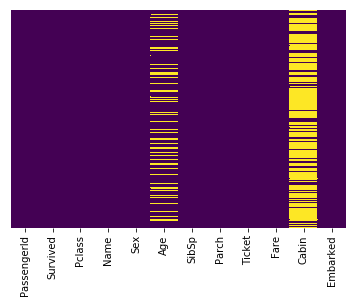

In [26]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

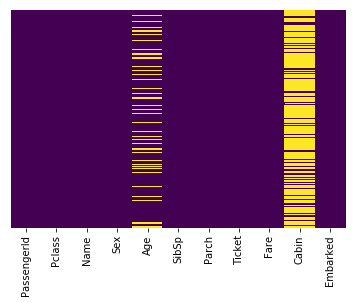

In [27]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Infant are the highest number of survivor among Agegroup

In [28]:
train_data=train_data.drop(['Cabin','Ticket'],axis=1)
test_data=test_data.drop(['Cabin','Ticket'],axis=1)
combine_data=[train_data,test_data]

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 59.2+ KB


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 24.6+ KB


In [31]:
mode=train_data.mode()['Embarked'][0]

In [32]:
train_data['Embarked'].fillna(mode,inplace=True)


In [33]:
combine_data=[train_data,test_data]

for dataset in combine_data:
    dataset['Title']= dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
for dataset in combine_data:
    dataset['Title']= dataset['Title'].replace(['Lady','Capt','Col', 'Don','Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title']=  dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title','Survived']].groupby(['Title'],as_index= False).mean()            
        
    
    
    
    
    
    
    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [35]:
title_mapping={"Mr.":1,"Miss":2,"Mrs":3,"Master":4,"Royal":5,"rare":6}
for dataset in combine_data:
    #print(dataset['Title'])
    dataset['Title']= dataset['Title'].map(title_mapping)
    dataset['Title']= dataset['Title'].fillna(0).astype(int)
    
    
train_data.head()
#train_data.info()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [36]:
for dataset in combine_data:
    #print(dataset['Title'])
    dataset['Embarked']= pd.get_dummies(dataset['Embarked'],drop_first=True)
    dataset['Sex']= pd.get_dummies(dataset['Sex'],drop_first=True)
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0


In [37]:
train_data["Embarked"].value_counts()

0    814
1     77
Name: Embarked, dtype: int64

In [38]:
train_data["Embarked"].value_counts()

0    814
1     77
Name: Embarked, dtype: int64

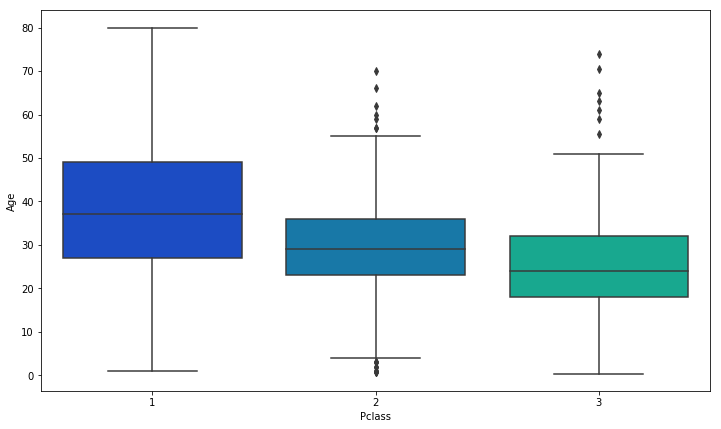

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

In [40]:
def enter_age(cols):
    Age=cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass== 1:
            return 37
        
        elif Pclass== 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [41]:
train_data['Age']= train_data[['Age','Pclass']].apply(enter_age,axis=1).astype(int)

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null uint8
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null uint8
Title          891 non-null int32
dtypes: float64(1), int32(2), int64(5), object(1), uint8(2)
memory usage: 54.0+ KB


In [43]:
test_data['Age']= test_data[['Age','Pclass']].apply(enter_age,axis=1).astype(int)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null uint8
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null uint8
Title          418 non-null int32
dtypes: float64(1), int32(2), int64(4), object(1), uint8(2)
memory usage: 22.1+ KB


In [44]:
train_data=train_data.drop(['Name'],axis=1)
test_data=test_data.drop(['Name'],axis=1)

In [45]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22,1,0,7.2500,0,0
1,2,1,1,0,38,1,0,71.2833,0,3
2,3,1,3,0,26,0,0,7.9250,0,2
3,4,1,1,0,35,1,0,53.1000,0,3
4,5,0,3,1,35,0,0,8.0500,0,0


In [46]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,34,0,0,7.8292,1,0
1,893,3,0,47,1,0,7.0000,0,3
2,894,2,1,62,0,0,9.6875,1,0
3,895,3,1,27,0,0,8.6625,0,0
4,896,3,0,22,1,1,12.2875,0,3


Model Selection

In [47]:
mean_test=test_data['Fare'].mean()

In [48]:
test_data['Fare'].fillna(mean_test,inplace=True)

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null uint8
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null uint8
Title          418 non-null int32
dtypes: float64(1), int32(2), int64(4), uint8(2)
memory usage: 20.5 KB


In [50]:
from sklearn.model_selection import train_test_split
predictors=train_data.drop(['PassengerId','Survived'],axis=1)
target=train_data['Survived']
X_train,X_test,y_train,y_test=train_test_split(predictors,target,test_size=0.2,random_state=112)

Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
print(predictions)

[0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1]


C:\Users\Sandesh Chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,predictions)
print('cm of the model is {}'.format(cm))
acc_LR=round(accuracy_score(y_test,predictions)*100,2)
print('accuracy  of the LR  model is {}'.format(acc_LR))

cm of the model is [[104  13]
 [ 16  46]]
accuracy  of the LR  model is 83.8


Support Vector Machines(SVM)

In [53]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
predictions=svc.predict(X_test)
acc_SVC=round(accuracy_score(y_test,predictions)*100,2)
print('accuracy  of the SVC  model is {}'.format(acc_SVC))

accuracy  of the SVC  model is 77.09


C:\Users\Sandesh Chand\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Guassian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
predictions=gaussian.predict(X_test)
acc_gaussian=round(accuracy_score(y_test,predictions)*100,2)
print('accuracy  of the GaussianNB  model is {}'.format(acc_gaussian))

accuracy  of the GaussianNB  model is 83.8


Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
decisionTree=DecisionTreeClassifier()
decisionTree.fit(X_train,y_train)
predictions=decisionTree.predict(X_test)
acc_DT=round(accuracy_score(y_test,predictions)*100,2)
print('accuracy  of the DT model is {}'.format(acc_DT))

accuracy  of the DT model is 79.89


Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
predictions=rf.predict(X_test)
acc_rf=round(accuracy_score(y_test,predictions)*100,2)
print('accuracy  of the RF model is {}'.format(acc_rf))

accuracy  of the RF model is 83.24


C:\Users\Sandesh Chand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbk=GradientBoostingClassifier()
gbk.fit(X_train,y_train)
predictions=gbk.predict(X_test)
acc_gbk=round(accuracy_score(y_test,predictions)*100,2)
print('accuracy  of the gbk  model is {}'.format(acc_gbk))


accuracy  of the gbk  model is 86.03


In [ ]:
models=pd.DataFrame({'Model':['Logistic Regression','Suppor vector Mechanism','Decision Tree','Random Forest','Guassian Naive Bayes',
                              'Gradient Boosting Classifier'],
                     'Score':[acc_LR,acc_SVC,acc_DT,acc_rf,acc_gaussian,acc_gbk,]})

models.sort_values(by='Score',ascending=False)

Creating Submission File

In [70]:
id=test_data['PassengerId']
predictions=gbk.predict(test_data.drop('PassengerId',axis=1))
#print({'PassengerId':id,'Survived':predictions})
final_Output=pd.DataFrame({'PassengerId':id,'Survived':predictions})
final_Output.to_csv(r'C:\Users\Sandesh Chand\Desktop\Titanic\Submission.csv',index=False)

In [69]:
final_Output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
